In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

# 1. 載入 customer_churn.csv 為 pandas DataFrame 格式 (0%)

In [2]:
df = pd.read_csv('customer_churn.csv')
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,54023,1,1.0,Computer,1,31.0,Debit Card,Male,4.0,5,Mobile Phone,1,Single,3,1,25.0,2.0,2.0,1.0,149
1,50266,0,16.0,Mobile Phone,1,18.0,Debit Card,Male,2.0,4,Grocery,4,Married,2,0,11.0,0.0,NaN,9.0,243
2,54985,0,16.0,Mobile Phone,1,36.0,Credit Card,Male,3.0,6,Laptop & Accessory,1,Single,6,0,20.0,2.0,2.0,1.0,168
3,52029,1,0.0,Phone,3,NaN,E wallet,Male,2.0,4,Mobile,4,Married,2,1,18.0,0.0,1.0,0.0,124
4,50084,0,13.0,Computer,1,15.0,Debit Card,Male,3.0,4,Laptop & Accessory,2,Divorced,10,0,14.0,1.0,1.0,2.0,149


# 2. 列出資料筆數、屬性數量、每個欄位的空值個數以及各類別(target)的資料筆數(4%)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3083 entries, 0 to 3082
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   3083 non-null   int64  
 1   Churn                        3083 non-null   int64  
 2   Tenure                       2930 non-null   float64
 3   PreferredLoginDevice         3083 non-null   object 
 4   CityTier                     3083 non-null   int64  
 5   WarehouseToHome              2929 non-null   float64
 6   PreferredPaymentMode         3083 non-null   object 
 7   Gender                       3083 non-null   object 
 8   HourSpendOnApp               2933 non-null   float64
 9   NumberOfDeviceRegistered     3083 non-null   int64  
 10  PreferedOrderCat             3083 non-null   object 
 11  SatisfactionScore            3083 non-null   int64  
 12  MaritalStatus                3083 non-null   object 
 13  NumberOfAddress   

## 顯示空值

In [4]:
df.isnull().sum()

CustomerID                       0
Churn                            0
Tenure                         153
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                154
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 150
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    131
CouponUsed                     126
OrderCount                     128
DaySinceLastOrder              166
CashbackAmount                   0
dtype: int64

## 各類別(target)的資料筆數

In [5]:
def printAttributeValueCounts(colName):
    print(df[colName].value_counts())

In [6]:
for i in range(1, len(df.columns)):
    printAttributeValueCounts(df.columns[i])

0    2132
1     951
Name: Churn, dtype: int64
1.0     501
0.0     380
8.0     120
7.0     118
9.0     117
5.0     116
10.0    112
12.0    105
4.0      99
3.0      95
11.0     94
13.0     87
14.0     87
2.0      84
6.0      82
15.0     81
16.0     74
19.0     66
20.0     60
18.0     51
17.0     50
21.0     47
23.0     40
22.0     38
28.0     37
30.0     36
24.0     29
27.0     29
25.0     26
26.0     24
31.0     21
29.0     21
50.0      1
60.0      1
61.0      1
Name: Tenure, dtype: int64
Mobile Phone    1458
Computer         928
Phone            697
Name: PreferredLoginDevice, dtype: int64
1    1966
3     985
2     132
Name: CityTier, dtype: int64
9.0      296
8.0      237
7.0      211
16.0     182
15.0     165
6.0      164
14.0     151
10.0     148
13.0     128
12.0     123
11.0     120
17.0     110
31.0      65
32.0      64
22.0      61
30.0      58
18.0      56
29.0      55
35.0      50
24.0      48
25.0      48
23.0      47
21.0      46
19.0      46
20.0      41
26.0      41
27.0  

# 3. 資料集中有部分資料重覆出現，請刪除重覆多餘的資料 (僅保留一筆)，並列出剩餘的資料筆數。 (2%)

In [7]:
df[df.duplicated()]

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
1220,50180,0,12.0,Mobile Phone,1,6.0,Credit Card,Male,2.0,2,Fashion,2,Married,1,0,17.0,3.0,3.0,7.0,196
2100,50135,1,0.0,Computer,1,35.0,CC,Male,3.0,4,Mobile,4,Single,1,0,11.0,1.0,1.0,4.0,135
2769,50135,1,0.0,Computer,1,35.0,CC,Male,3.0,4,Mobile,4,Single,1,0,11.0,1.0,1.0,4.0,135
2846,50081,1,0.0,Mobile Phone,3,33.0,E wallet,Female,2.0,3,Fashion,2,Divorced,2,0,22.0,1.0,1.0,9.0,176
2935,50180,0,12.0,Mobile Phone,1,6.0,Credit Card,Male,2.0,2,Fashion,2,Married,1,0,17.0,3.0,3.0,7.0,196


In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.shape

(3078, 20)

# 4. 填補空值及其他資料前處理 (e.g., feature encoding) (10%)

## 填補空值

<AxesSubplot:xlabel='Gender'>

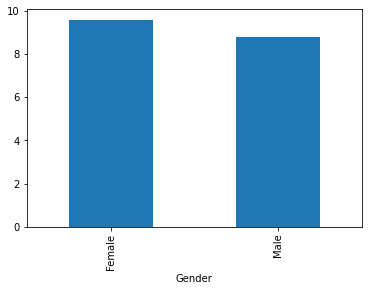

In [10]:
df.groupby('Gender')['Tenure'].mean().plot(kind='bar')

In [11]:
df['Tenure'] = df.groupby('Gender')['Tenure'].apply(lambda x : x.fillna(x.mean()))

In [12]:
df['WarehouseToHome'] = df['WarehouseToHome'].fillna(df['WarehouseToHome'].mean())

In [13]:
df['HourSpendOnApp'] = df['HourSpendOnApp'].fillna(df['HourSpendOnApp'].mean())

In [14]:
df['OrderAmountHikeFromlastYear'] = df['OrderAmountHikeFromlastYear'].fillna(df['OrderAmountHikeFromlastYear'].mean())

<AxesSubplot:xlabel='Gender'>

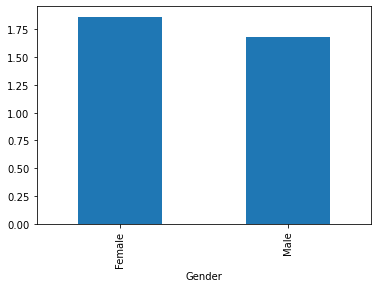

In [15]:
df.groupby('Gender')['CouponUsed'].mean().plot(kind='bar')

In [16]:
df['CouponUsed'] = df.groupby('Gender')['CouponUsed'].apply(lambda x : x.fillna(x.mean()))

<AxesSubplot:xlabel='Gender'>

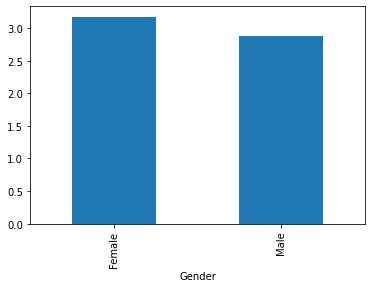

In [17]:
df.groupby('Gender')['OrderCount'].mean().plot(kind='bar')

In [18]:
df['OrderCount'] = df.groupby('Gender')['OrderCount'].apply(lambda x : x.fillna(x.mean()))

<AxesSubplot:xlabel='Gender'>

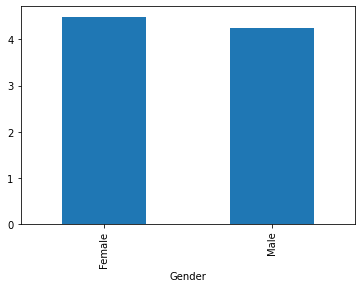

In [19]:
df.groupby('Gender')['DaySinceLastOrder'].mean().plot(kind='bar')

In [20]:
df['DaySinceLastOrder'] = df.groupby('Gender')['DaySinceLastOrder'].apply(lambda x : x.fillna(x.mean()))

## Correlation

In [21]:
df.corr()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
CustomerID,1.000000,-0.026877,0.031858,-0.005158,0.051072,0.578722,0.416670,-0.023850,0.156715,-0.035396,0.112156,0.218328,0.124882,0.094126,0.208316
Churn,-0.026877,1.000000,-0.420024,0.104360,0.100536,0.013465,0.121608,0.123277,0.031685,0.294616,-0.015446,-0.013337,-0.039562,-0.199191,-0.202828
Tenure,0.031858,-0.420024,1.000000,-0.060067,-0.026710,-0.017373,-0.052277,-0.039961,0.218516,-0.081796,0.014902,0.108446,0.179173,0.196859,0.463930
CityTier,-0.005158,0.104360,-0.060067,1.000000,0.023909,-0.041166,0.027585,-0.009178,-0.025017,0.020360,-0.035812,0.013520,0.031014,0.004287,0.059505
WarehouseToHome,0.051072,0.100536,-0.026710,0.023909,1.000000,0.047467,0.003211,0.006668,-0.031420,0.039627,0.060891,-0.010430,0.004336,0.000754,-0.011671
HourSpendOnApp,0.578722,0.013465,-0.017373,-0.041166,0.047467,1.000000,0.312187,0.046720,0.130366,0.001395,0.087164,0.168218,0.096214,0.064632,0.110534
NumberOfDeviceRegistered,0.416670,0.121608,-0.052277,0.027585,0.003211,0.312187,1.000000,-0.022655,0.095489,-0.012206,0.051574,0.124333,0.066348,-0.014567,0.112581
SatisfactionScore,-0.023850,0.123277,-0.039961,-0.009178,0.006668,0.046720,-0.022655,1.000000,0.049881,-0.015167,-0.004987,0.009879,0.000537,-0.004206,-0.010437
NumberOfAddress,0.156715,0.031685,0.218516,-0.025017,-0.031420,0.130366,0.095489,0.049881,1.000000,-0.017301,-0.015966,0.035385,-0.000826,-0.048948,0.188626
Complain,-0.035396,0.294616,-0.081796,0.020360,0.039627,0.001395,-0.012206,-0.015167,-0.017301,1.000000,-0.006674,-0.031573,-0.040034,-0.080857,-0.048360


## Feature encodeing

In [22]:
df = pd.get_dummies(data=df, columns=['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus'])
df.head()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,...,Gender_Male,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,54023,1,1.0,1,31.000000,4.0,5,1,3,1,...,1,0,0,0,0,1,0,0,0,1
1,50266,0,16.0,1,18.000000,2.0,4,4,2,0,...,1,0,1,0,0,0,0,0,1,0
2,54985,0,16.0,1,36.000000,3.0,6,1,6,0,...,1,0,0,1,0,0,0,0,0,1
3,52029,1,0.0,3,15.758208,2.0,4,4,2,1,...,1,0,0,0,1,0,0,0,1,0
4,50084,0,13.0,1,15.000000,3.0,4,2,10,0,...,1,0,0,1,0,0,0,1,0,0


In [23]:
df = df.drop(['Gender_Male'], axis=1)
df.head()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,...,Gender_Female,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,54023,1,1.0,1,31.000000,4.0,5,1,3,1,...,0,0,0,0,0,1,0,0,0,1
1,50266,0,16.0,1,18.000000,2.0,4,4,2,0,...,0,0,1,0,0,0,0,0,1,0
2,54985,0,16.0,1,36.000000,3.0,6,1,6,0,...,0,0,0,1,0,0,0,0,0,1
3,52029,1,0.0,3,15.758208,2.0,4,4,2,1,...,0,0,0,0,1,0,0,0,1,0
4,50084,0,13.0,1,15.000000,3.0,4,2,10,0,...,0,0,0,1,0,0,0,1,0,0


# 5. 將資料集劃分為訓練集與測試集 (1%)

In [24]:
X1 = df.drop(['CustomerID', 'Churn'], axis=1)
y1 = df['Churn']

In [25]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=0)

# 6. 訓練與測試 SVM、Logistic Regression、Decision Tree 模型 (10%)

## SVM

In [26]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

svm1 = make_pipeline(StandardScaler(), SVC(gamma='auto', random_state=0, kernel='rbf'))
svm1 = svm1.fit(X1_train, y1_train)
svm1_prediction = svm1.predict(X1_test)

svm2 = make_pipeline(StandardScaler(), SVC(gamma='auto', random_state=0, kernel='poly'))
svm2 = svm2.fit(X1_train, y1_train)
svm2_prediction = svm2.predict(X1_test)

svm3 = make_pipeline(StandardScaler(), SVC(gamma='auto', random_state=0, kernel='sigmoid'))
svm3 = svm3.fit(X1_train, y1_train)
svm3_prediction = svm3.predict(X1_test)

## Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression
lr1 = LogisticRegression(random_state=0, max_iter=10000, solver='lbfgs').fit(X1_train, y1_train)
lr1_prediction = lr1.predict(X1_test)

lr2 = LogisticRegression(random_state=0, max_iter=10000, solver='liblinear').fit(X1_train, y1_train)
lr2_prediction = lr2.predict(X1_test)

lr3 = LogisticRegression(random_state=0, max_iter=10000, solver='sag').fit(X1_train, y1_train)
lr3_prediction = lr3.predict(X1_test)

lr4 = LogisticRegression(random_state=0, max_iter=10000, solver='saga').fit(X1_train, y1_train)
lr4_prediction = lr4.predict(X1_test)

## Decision Tree

In [28]:
from sklearn.tree import DecisionTreeClassifier
tree1 = DecisionTreeClassifier(random_state=0, criterion='gini')
tree1 = tree1.fit(X1_train, y1_train)
tree1_prediction = tree1.predict(X1_test)

tree2 = DecisionTreeClassifier(random_state=0, criterion='entropy')
tree2 = tree2.fit(X1_train, y1_train)
tree2_prediction = tree2.predict(X1_test)

# 7. 請以 Accuracy 評估同一模型在不同超參數設定下於訓練資料及測試資料上的表現(至少比較兩組超參數) (6%)


In [29]:
from sklearn.metrics import accuracy_score

def getModelAccuracy(X, y, model):
    prediction = model.predict(X)
    return accuracy_score(y, prediction)

In [30]:
svm_accuracy_list = [[getModelAccuracy(X1_test, y1_test, svm1), getModelAccuracy(X1_test, y1_test, svm2), 
                      getModelAccuracy(X1_test, y1_test, svm3)]]
svm_accuracy_df = pd.DataFrame(data=svm_accuracy_list, columns=['rbf', 'poly', 'sigmoid'], index=['svm_accuracy'])
svm_accuracy_df

,rbf,poly,sigmoid
svm_accuracy,0.854978,0.857143,0.790043


In [31]:
lr_accuracy_list = [[getModelAccuracy(X1_test, y1_test, lr1), getModelAccuracy(X1_test, y1_test, lr2),
                    getModelAccuracy(X1_test, y1_test, lr3), getModelAccuracy(X1_test, y1_test, lr4)]]
lr_accuracy_df = pd.DataFrame(data=lr_accuracy_list, columns=['lbfgs', 'liblinear', 'sag', 'saga'], index=['lr_accuracy'])
lr_accuracy_df

,lbfgs,liblinear,sag,saga
lr_accuracy,0.840909,0.841991,0.840909,0.843074


In [32]:
tree_accuracy_list = [[getModelAccuracy(X1_test, y1_test, tree1), getModelAccuracy(X1_test, y1_test, tree2)]]
tree_accuracy_df = pd.DataFrame(data=tree_accuracy_list, columns=['gini', 'entropy'], index=['tree_accuracy'])
tree_accuracy_df

,gini,entropy
tree_accuracy,0.900433,0.891775


# 8. 請以 Accuracy 比較三個模型的表現 (6%)

In [33]:
accuracy_list = [[getModelAccuracy(X1_test, y1_test, svm1),getModelAccuracy(X1_test, y1_test, lr1),getModelAccuracy(X1_test, y1_test, tree1)]]
accuracy_score_df = pd.DataFrame(data = accuracy_list, columns = ['SVM', 'Logistic Regression', 'Decision Tree'], index=['accuracy'])
accuracy_score_df

,SVM,Logistic Regression,Decision Tree
accuracy,0.854978,0.840909,0.900433


# 9. 請列出三個模型的 Confusion matrix，並簡述其意義 (6%)

In [34]:
from sklearn.metrics import confusion_matrix

## SVM

In [35]:
pd.DataFrame(confusion_matrix(y1_test, svm1_prediction), columns=['預測不會流失', '預測會流失'], index=['真實不會流失', '真實會流失'])

,預測不會流失,預測會流失
真實不會流失,583,50
真實會流失,84,207


## Logistic Regression

In [36]:
pd.DataFrame(confusion_matrix(y1_test, lr1_prediction), columns=['預測不會流失', '預測會流失'], index=['真實不會流失', '真實會流失'])

,預測不會流失,預測會流失
真實不會流失,581,52
真實會流失,95,196


## Decision Tree

In [37]:
pd.DataFrame(confusion_matrix(y1_test, tree1_prediction), columns=['預測不會流失', '預測會流失'], index=['真實不會流失', '真實會流失'])

,預測不會流失,預測會流失
真實不會流失,576,57
真實會流失,35,256


我們可以利用Confusion matrix求出accuracy rate和其他指標。以Decision Tree的accuracy rate為例，(576+256) / (576+57+35+256) = 0.900433 